In [11]:
"""
Data visualization
Author: Xionghui Xu
Date: July 11, 2025
"""
import os
import numpy as np
import xarray as xr
import pandas as pd
import netCDF4 as nc
import rioxarray as rxr
from concurrent.futures import ThreadPoolExecutor
import warnings

In [12]:
#### Here we set the configuration
resolution = "500"
region = [-180,180,-60,90]
data_path = f'data/run/'
shp_path = 'data/Shp/'
field_path = 'data/field/'
fig_path = 'fig/'

# Visualization

## 1. Data Export

In [14]:
df = pd.read_csv(f'{field_path}/field_all.csv', encoding='latin-1')

s1 = nc.Dataset(f'{data_path}Sbedrock_tmp2.nc4', 'r')
s2 = nc.Dataset(f'{data_path}Ssoil.nc4', 'r')
s3 = nc.Dataset(f'{data_path}DTB.nc4', 'r')
s4 = nc.Dataset(f'{data_path}masking_criteria/mask_shallow_bedrock.nc4', 'r')
s5 = nc.Dataset(f'{data_path}masking_criteria/mask_woody_veg.nc4', 'r')
s6 = nc.Dataset(f'{data_path}masking_criteria/mask_adequate_water.nc4', 'r')
s7 = nc.Dataset(f'{data_path}masking_criteria/mask_Dbedrock_gt_0.nc4', 'r')
s8 = nc.Dataset(f'{data_path}masking_criteria/mask_combine_all.nc4', 'r')

lat = df['Latitude']
lon = df['Longitude']
ssa = df['Same Site As']

lat1 = s1.variables['lat'][:]
lon1 = s1.variables['lon'][:]

df2 = pd.DataFrame()
j = 0
for i in range(len(lat)):
    lat1_index = np.argmin(np.abs(lat1 - lat[i]))
    lon1_index = np.argmin(np.abs(lon1 - lon[i]))
    lat1_target = lat1[lat1_index]
    lon1_target = lon1[lon1_index]
    
    df2.loc[j, 'Measure'] = df.loc[i, 'Measurement or Estimate of RM Contribution to ET?']
    df2.loc[j, 'Citation'] = df.loc[i, 'Citation']
    df2.loc[j, 'lat'] = round(lat[i], 6)
    df2.loc[j, 'lon'] = round(lon[i], 6)
    df2.loc[j, 'lat'] = lat[i]
    df2.loc[j, 'lon'] = lon[i]
    df2.loc[j, 'Sbedrock_field_min'] = df.loc[i, 'Minimum']
    df2.loc[j, 'Sbedrock_field_max'] = df.loc[i, 'Maximum']
    df2.loc[j, 'Sbedrock'] = s1['Band1'][lat1_index,lon1_index]
    df2.loc[j, 'Ssoil'] = s2['Band1'][lat1_index,lon1_index]
    df2.loc[j, 'Soil_depth'] = df.loc[i, 'SoilDepth_Numberline_cm']
    df2.loc[j, 'DTB'] = s3['Band1'][lat1_index,lon1_index]
    df2.loc[j, 'mask_shallow_bedrock'] = s4['Band1'][lat1_index,lon1_index]
    df2.loc[j, 'mask_woody_veg'] = s5['LC'][0,lat1_index,lon1_index]
    df2.loc[j, 'mask_adequate_water'] = s6['et'][0,lat1_index,lon1_index]
    df2.loc[j, 'mask_Dbedrock_gt_0'] = s7['Dbedrock'][lat1_index,lon1_index]
    df2.loc[j, 'mask_combine_all'] = s8['Band1'][lat1_index,lon1_index]
    
    j += 1

unique_pairs = df2[['lat', 'lon']].drop_duplicates().shape[0]
print(f"Unique (lat, lon) pairs in df2: {unique_pairs}")

df3 = df2.groupby(['lat', 'lon']).first().reset_index()
df3['num'] = range(len(df3['lat']))
    
print((df3['Measure']=='N').sum())
print((df3['Measure']=='Y').sum())
df3

/home/xuxh22/anaconda3/envs/jupyter/lib/python3.10/site-packages/pandas/core/internals/blocks.py:1429: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = casted
/home/xuxh22/anaconda3/envs/jupyter/lib/python3.10/site-packages/pandas/core/internals/blocks.py:1429: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = casted
/home/xuxh22/anaconda3/envs/jupyter/lib/python3.10/site-packages/pandas/core/internals/blocks.py:1429: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = casted
/home/xuxh22/anaconda3/envs/jupyter/lib/python3.10/site-packages/pandas/core/internals/blocks.py:1429: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = casted
/home/xuxh22/anaconda3/envs/jupyter/lib/python3.10/site-packages/pandas/core/internals/blocks.py:1429: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = casted
/home/xuxh22/anaconda3/envs/jupyter/lib/python3.10/site-pack

Unique (lat, lon) pairs in df2: 80
40
40


/home/xuxh22/anaconda3/envs/jupyter/lib/python3.10/site-packages/pandas/core/internals/blocks.py:1429: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = casted
/home/xuxh22/anaconda3/envs/jupyter/lib/python3.10/site-packages/pandas/core/internals/blocks.py:1429: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = casted
/home/xuxh22/anaconda3/envs/jupyter/lib/python3.10/site-packages/pandas/core/internals/blocks.py:1429: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = casted
/home/xuxh22/anaconda3/envs/jupyter/lib/python3.10/site-packages/pandas/core/internals/blocks.py:1429: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = casted
/home/xuxh22/anaconda3/envs/jupyter/lib/python3.10/site-packages/pandas/core/internals/blocks.py:1429: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = casted
/home/xuxh22/anaconda3/envs/jupyter/lib/python3.10/site-pack

lat         lon Measure        Citation  Sbedrock_field_min  \
0  -34.300000   19.150000       N    Lamont, 1984                 NaN   
1  -32.338300  116.090400       N      Dell, 1983                 NaN   
2  -30.412800   18.249700       N   Carrick, 2003                 NaN   
3   11.730000   76.450000       Y      Ruiz, 2010                 NaN   
4   20.815556  -89.245000       Y  Querejeta 2007                 NaN   
..        ...         ...     ...             ...                 ...   
75  46.000000    4.500000       N      Curt, 2001                 NaN   
76  48.666111   14.707778       N   Samonil, 2020                 NaN   
77  48.978611   13.811944       N   Samonil, 2020                 NaN   
78  49.359722   18.383333       N   Samonil, 2020                 NaN   
79  55.500000 -132.700000       N  Swanston, 1970                 NaN   

    Sbedrock_field_max    Sbedrock       Ssoil  Soil_depth     DTB  \
0                  NaN  146.728897   84.443176        60.0   100.0   
1                  NaN  300.747009   75.005013         NaN   100.0   
2                  NaN   68.039391   69.475952         0.3   100.0   
3                  NaN  199.296448   99.152634         NaN   100.0   
4                  NaN  160.840363  233.316879        30.0  5000.0   
..                 ...         ...         ...         ...     ...   
75                 NaN   98.375595   97.704414       112.0   100.0   
76                 NaN    1.204391  110.730072        75.0   100.0   
77                 NaN    0.000000  115.840057        64.0   100.0   
78                 NaN    0.000000  111.901398        72.0   100.0   
79                 NaN   13.051522  132.141998         NaN   100.0   

    mask_shallow_bedrock  mask_woody_veg  mask_adequate_water  \
0                    1.0             1.0                  NaN   
1                    1.0             1.0                  NaN   
2                    1.0             1.0                  NaN   
3                    1.0             1.0                  1.0   
4                    NaN             0.0                  NaN   
..                   ...             ...                  ...   
75                   1.0             1.0                  1.0   
76                   1.0             1.0                  1.0   
77                   1.0             1.0                  1.0   
78                   1.0             1.0                  1.0   
79                   1.0             1.0                  1.0   

    mask_Dbedrock_gt_0  mask_combine_all  num  
0                  1.0               NaN    0  
1                  1.0               NaN    1  
2                  1.0               NaN    2  
3                  1.0               1.0    3  
4                  1.0               NaN    4  
..                 ...               ...  ...  
75                 1.0               1.0   75  
76                 1.0               1.0   76  
77                 NaN               NaN   77  
78                 NaN               NaN   78  
79                 1.0               1.0   79  

[80 rows x 16 columns]

## 2. Plotting

In [15]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [16]:
pd.set_option('display.max_columns', None)
font = {'family': 'Arial'}
matplotlib.rc('font', **font)

In [17]:
df4 = df3.copy()

### 2.1 Fig 1b

In [18]:
igbp_data = xr.open_dataset(f'{data_path}IGBP.nc4')
bedrock_data = xr.open_dataset(f'{data_path}DTB.nc4')

igbp_data = igbp_data['LC'][0,:,:]
bedrock_data = bedrock_data['Band1']

# bedrock_mask = bedrock_data < 150
igbp_mask = np.where((igbp_data<10), igbp_data, np.nan)
bedrock_mask = np.where((bedrock_data < 150) & (igbp_data<10) ,bedrock_data,np.nan)

igbp_mask_xr = xr.DataArray(igbp_mask, dims=["lat", "lon"], coords={"lat": igbp_data.coords["lat"], "lon": igbp_data.coords["lon"]})
bedrock_mask_xr = xr.DataArray(bedrock_mask, dims=["lat", "lon"], coords={"lat": igbp_data.coords["lat"], "lon": igbp_data.coords["lon"]})

In [19]:
igbp_mask_xr = igbp_mask_xr.coarsen(lat=2, lon=2, boundary='trim').mean()
bedrock_mask_xr = bedrock_mask_xr.coarsen(lat=2, lon=2, boundary='trim').mean()

/home/xuxh22/anaconda3/envs/jupyter/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'edgecolor', 'rasterized'
  result = super().contourf(*args, **kwargs)


40
40


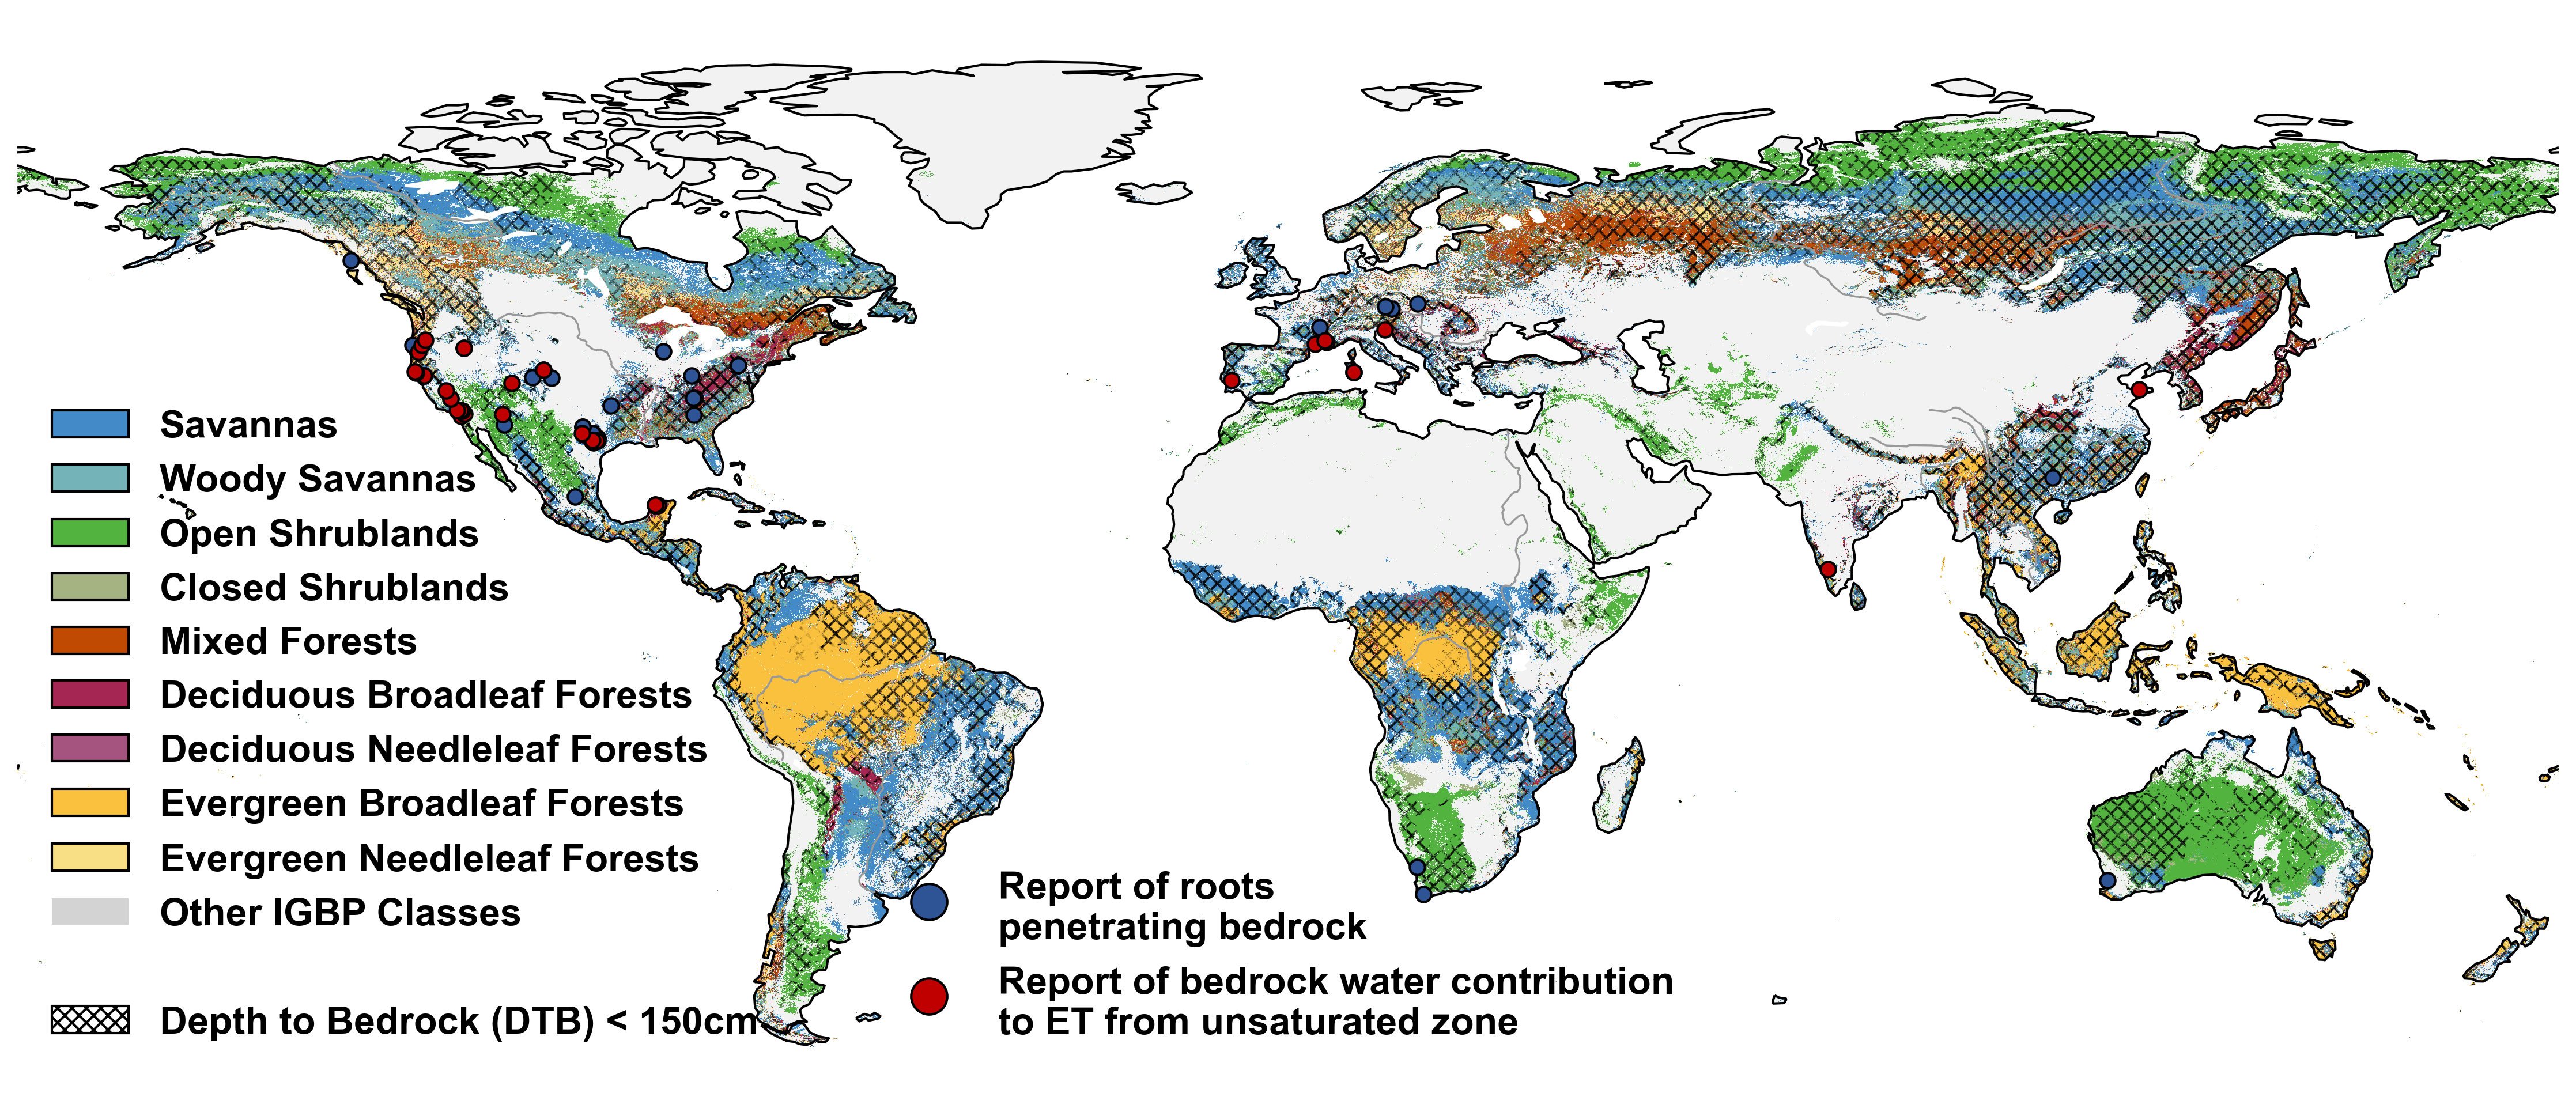

In [20]:
igbp_colors = ['#f8de85', '#FAC13E','#a5537f','#a52653',
               '#c04a02','#A4B381','#52B33F','#74B3B8',
               '#428ac8','#7846A8']

labels = ['Evergreen Needleleaf Forests', 'Evergreen Broadleaf Forests', 'Deciduous Needleleaf Forests','Deciduous Broadleaf Forests',
            'Mixed Forests','Closed Shrublands', 'Open Shrublands', 'Woody Savannas', 'Savannas']

cmap = colors.ListedColormap(igbp_colors[:])
bounds = np.arange(0.5, 11.5, 1)
norm = colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(15, 8) ,dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

im = igbp_mask_xr.plot.pcolormesh(
    ax=ax,
    cmap=cmap,
    norm=norm,
    add_colorbar=False,
    transform=ccrs.PlateCarree(),
    rasterized=True
)

cs = bedrock_mask_xr.plot.contourf(
    ax=ax,
    levels=[0, 1.5],
    colors='none',    
    hatches=['xxxx'],
    edgecolor=(1, 0, 0, 0.3),
    alpha=0,  
    add_colorbar=False,
    transform=ccrs.PlateCarree(),
    rasterized=True
)

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(0)  

ax.set_xlim(region[0], region[1])
ax.set_ylim(region[2], region[3])

rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '110m', edgecolor='0.6', facecolor='none')
ax.add_feature(cfeature.LAND, facecolor='0.95')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES, alpha=1, facecolor='white', edgecolor='white')
ax.add_feature(rivers, linewidth=0.8)
# ax.gridlines(draw_labels=False, linestyle=':', linewidth=0.7, color='grey', alpha=0.8)

ax.set_extent(region)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

ax.add_feature(cfeature.OCEAN, facecolor='white')  



df5 = df4[ (df4['Measure'] == 'N')]
print(len(df5))
ax.scatter(df5['lon'], df5['lat'], marker='o',
                s=40, linewidths=1, edgecolors="black", facecolors="#2f5496", label='Report of roots \npenetrating bedrock', zorder=2)

df5 = df4[ (df4['Measure'] == 'Y')]
print(len(df5))
ax.scatter(df5['lon'], df5['lat'], marker='o',
                s=40, linewidths=1, edgecolors="black", facecolors="#c00000", label='Report of bedrock water contribution \nto ET from unsaturated zone', zorder=2)

legend_elements1 = [
    Patch(facecolor=igbp_colors[8-i], edgecolor='black', label=labels[8-i]) 
    for i in range(9)
]
legend_elements1.append(Patch(facecolor='#d3d3d3', label='Other IGBP Classes'))
legend_elements1.append(Patch(facecolor='#ffffff', label=''))
legend_elements1.append(Patch(facecolor='none', hatch='xxxx', edgecolor='black', label='Depth to Bedrock (DTB) < 150cm'))

legend_elements2 = [
    Line2D([0], [0], marker='o', color='w', markeredgecolor='black', markerfacecolor='#2f5496', markersize=15, label='Report of roots \npenetrating bedrock'),
    Line2D([0], [0], marker='o', color='w', markeredgecolor='black', markerfacecolor='#c00000', markersize=15, label='Report of bedrock water contribution \nto ET from unsaturated zone')
]
# legend_elements2.append(Patch(facecolor='none', hatch='xxxx', edgecolor='black', label='Depth to Bedrock (DTB) < 150cm'))

leg1 = ax.legend(
    handles=legend_elements1,
    loc='lower left',
    frameon=False,
    title='',
    prop={'weight': 'bold', 'size': 16},
)

ax.add_artist(leg1)

ax.legend(
    handles=legend_elements2,
    loc='lower center',
    frameon=False,
    title='',
    prop={'weight': 'bold', 'size': 16},
    handlelength=2, handleheight=2
)

# plt.title('Global Woody Vegetation Cover with Bedrock Depth', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

### 2.1 Extended Data Fig 4

In [21]:
## Extract Columns for Barplot (NOTE: Must exclude first header row manually)
roots = df3.copy()
roots = roots[roots['Sbedrock_field_min'] > 0]
roots = roots.sort_values(by=['lon']).reset_index(drop=True)
barplot = pd.DataFrame()
barplot = roots.copy()
# print(barplot)
barplot

lat       lon Measure                  Citation  Sbedrock_field_min  \
0   39.7273 -123.6433       Y  Rempe and Dietrich, 2018               140.0   
1   39.5745 -123.4770       Y                Hahm, 2020                37.0   
2   39.1530 -122.3480       Y                Hahm, 2022                80.0   
3   37.0879 -119.2505       Y              O'Geen, 2018                44.0   
4   35.9570 -118.6300       Y             Hubbert 2001b               135.0   
5   33.4517 -117.1735       Y            Bornyasz, 2005               120.0   
6   33.8100 -116.6800       Y           Sternberg, 1996               394.0   
7   40.0280 -105.4880       Y               Burns, 2022                19.0   
8   29.8500  -98.4900       Y    McCole and Stern, 2007               999.0   
9   29.9400  -98.1200       Y          Schwinning, 2008               999.0   
10  37.2170  120.6000       Y                Wang, 2023                32.0   

    Sbedrock_field_max    Sbedrock       Ssoil  Soil_depth    DTB  \
0                420.0  315.163116  105.187485        45.0  100.0   
1                173.0  326.480164   94.761490         NaN  100.0   
2                300.0  232.444260   80.729317        50.0  100.0   
3                270.0  370.576965   76.520065         NaN  100.0   
4                380.0  422.785370   78.580620        75.0  100.0   
5                120.0  218.859009   83.487503        62.0  100.0   
6                406.0  165.480606    0.000000        35.0    0.0   
7                 64.0   19.188023    0.000000        30.0    0.0   
8                999.0  296.616028   81.310020        32.0  100.0   
9                999.0  163.523590   80.354553         NaN  100.0   
10                32.0   13.466855   86.125298        80.0  100.0   

    mask_shallow_bedrock  mask_woody_veg  mask_adequate_water  \
0                    1.0             1.0                  1.0   
1                    1.0             0.0                  1.0   
2                    1.0             0.0                  1.0   
3                    1.0             1.0                  1.0   
4                    1.0             1.0                  NaN   
5                    1.0             1.0                  NaN   
6                    1.0             0.0                  1.0   
7                    1.0             1.0                  1.0   
8                    1.0             0.0                  1.0   
9                    1.0             1.0                  1.0   
10                   1.0             0.0                  1.0   

    mask_Dbedrock_gt_0  mask_combine_all  num  
0                  1.0               1.0   59  
1                  1.0               NaN   56  
2                  1.0               NaN   54  
3                  1.0               1.0   47  
4                  1.0               NaN   44  
5                  1.0               NaN   34  
6                  1.0               NaN   38  
7                  1.0               1.0   61  
8                  1.0               NaN   12  
9                  1.0               1.0   15  
10                 1.0               NaN   48

In [22]:
df6 = barplot.copy()
df6['Sbedrock_field_mean'] = (df6['Sbedrock_field_min'] + df6['Sbedrock_field_max']) / 2
df6['std_dev_row'] = df6[['Sbedrock', 'Sbedrock_field_mean']].apply(lambda x: np.std(x), axis=1)
std_dev = np.std(df6[['Sbedrock', 'Sbedrock_field_mean']], axis=0)
print("STD is")
print(std_dev)

diff = df6['Sbedrock'] - df6['Sbedrock_field_mean']
std_dev_diff = np.std(diff)
print("Sbedrock with Sbedrock_field_mean STD is", std_dev_diff)

df6

STD is
Sbedrock               127.189148
Sbedrock_field_mean    333.555260
dtype: float64
Sbedrock with Sbedrock_field_mean STD is 341.70067741696135


lat       lon Measure                  Citation  Sbedrock_field_min  \
0   39.7273 -123.6433       Y  Rempe and Dietrich, 2018               140.0   
1   39.5745 -123.4770       Y                Hahm, 2020                37.0   
2   39.1530 -122.3480       Y                Hahm, 2022                80.0   
3   37.0879 -119.2505       Y              O'Geen, 2018                44.0   
4   35.9570 -118.6300       Y             Hubbert 2001b               135.0   
5   33.4517 -117.1735       Y            Bornyasz, 2005               120.0   
6   33.8100 -116.6800       Y           Sternberg, 1996               394.0   
7   40.0280 -105.4880       Y               Burns, 2022                19.0   
8   29.8500  -98.4900       Y    McCole and Stern, 2007               999.0   
9   29.9400  -98.1200       Y          Schwinning, 2008               999.0   
10  37.2170  120.6000       Y                Wang, 2023                32.0   

    Sbedrock_field_max    Sbedrock       Ssoil  Soil_depth    DTB  \
0                420.0  315.163116  105.187485        45.0  100.0   
1                173.0  326.480164   94.761490         NaN  100.0   
2                300.0  232.444260   80.729317        50.0  100.0   
3                270.0  370.576965   76.520065         NaN  100.0   
4                380.0  422.785370   78.580620        75.0  100.0   
5                120.0  218.859009   83.487503        62.0  100.0   
6                406.0  165.480606    0.000000        35.0    0.0   
7                 64.0   19.188023    0.000000        30.0    0.0   
8                999.0  296.616028   81.310020        32.0  100.0   
9                999.0  163.523590   80.354553         NaN  100.0   
10                32.0   13.466855   86.125298        80.0  100.0   

    mask_shallow_bedrock  mask_woody_veg  mask_adequate_water  \
0                    1.0             1.0                  1.0   
1                    1.0             0.0                  1.0   
2                    1.0             0.0                  1.0   
3                    1.0             1.0                  1.0   
4                    1.0             1.0                  NaN   
5                    1.0             1.0                  NaN   
6                    1.0             0.0                  1.0   
7                    1.0             1.0                  1.0   
8                    1.0             0.0                  1.0   
9                    1.0             1.0                  1.0   
10                   1.0             0.0                  1.0   

    mask_Dbedrock_gt_0  mask_combine_all  num  Sbedrock_field_mean  \
0                  1.0               1.0   59                280.0   
1                  1.0               NaN   56                105.0   
2                  1.0               NaN   54                190.0   
3                  1.0               1.0   47                157.0   
4                  1.0               NaN   44                257.5   
5                  1.0               NaN   34                120.0   
6                  1.0               NaN   38                400.0   
7                  1.0               1.0   61                 41.5   
8                  1.0               NaN   12                999.0   
9                  1.0               1.0   15                999.0   
10                 1.0               NaN   48                 32.0   

    std_dev_row  
0     17.581558  
1    110.740082  
2     21.222130  
3    106.788483  
4     82.642685  
5     49.429504  
6    117.259697  
7     11.155989  
8    351.191986  
9    417.738205  
10     9.266572

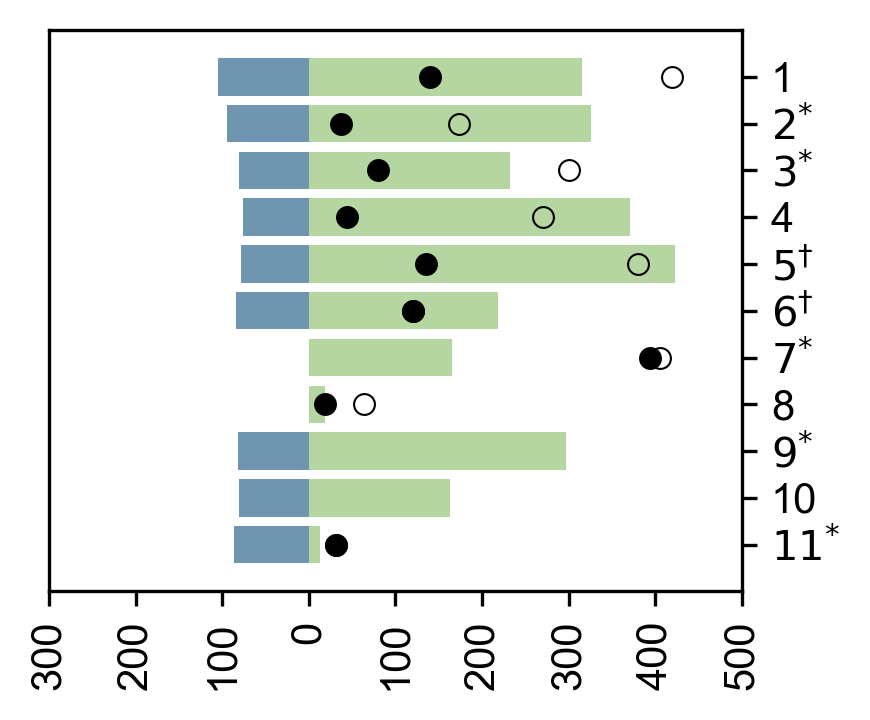

In [23]:

#barplot = barplot.dropna()
barplot['Ssoil'] = barplot['Ssoil'] * -1
barplot['Name'] = np.arange(1,12,1)

# barplot = barplot[0:20]
# barplot = barplot.sort_values(by = 'Number_For_Plotting')
# print(barplot)

# Make labels for X-axis to have accurate Ssoil and Dbedrock meanings
soillabels = list(np.arange(300, -100, step=-100))
dlabels = list(np.arange(100, 600, step=100))
labels = soillabels + dlabels

# Plot figure
plt.figure(figsize = (3, 2.5), dpi=300)
#plt.barh(barplot['Name'],barplot['Mean_D_bedrock_mm'], xerr = barplot['Stdev_D_bedrock_mm'], alpha=0.5, ecolor='black', capsize=3)
# plt.barh(barplot['Name'],barplot['Ssoil'], ecolor='black', capsize=3)


plt.barh(barplot['Name'],barplot['Sbedrock'], color = '#6faf45',alpha=0.5)
plt.barh(barplot['Name'],barplot['Ssoil'], color = '#6f95b1')


plt.plot(barplot['Sbedrock_field_min'],barplot['Name'], 'o', ms=5, markerfacecolor="black", markeredgecolor='black', markeredgewidth=0.5)
plt.plot(barplot['Sbedrock_field_max'],barplot['Name'],'o', ms=5, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.5)

# plt.xticks(np.arange(-150, 2050, step=50), labels = labels)
# plt.xticks(np.arange(0, 1600, step=200), labels = labels)
yticks = ['1','$2^{{*}}$','$3^{{*}}$','4','$5^{{†}}$','$6^{{†}}$','$7^{{*}}$','8','$9^{{*}}$','10','$11^{{*}}$']
plt.ylim(0, 12)
plt.yticks(np.arange(1, 12, 1), labels = yticks)
plt.xticks(np.arange(-300, 600, step=100), labels = labels)
plt.xlim(-300, 500)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
# ax.spines['left'].set_color('none')

## Uncomment for downloading fig
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.show()
# plt.savefig(f"{fig_path}/h1_fSb.pdf", transparent=True)